Using the old model prior to meeting to verify the recreation of the results.

In [2]:
import sys
sys.path.append("..")
import importlib
import numpy as np
import matplotlib.pyplot as plt
import qutip

import system.old_old_theoretical as system
importlib.reload(system)
import utils.solver as solver
importlib.reload(solver)
import pulse.tukey as pulse_gen
importlib.reload(pulse_gen)
import utils.expectation_values as expect
importlib.reload(expect)

pass

5.662187798447349


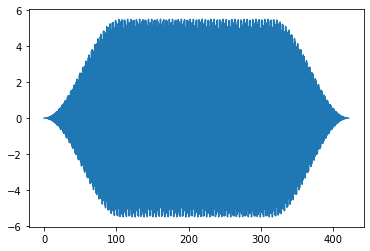

In [34]:
offset = 0.08
tlist = np.linspace(0, 421, 2000)
print(system.first_energy_spacing/3 - offset)
pulse_gen.setup(amplitude=5.5, drive_frequency= system.first_energy_spacing/3 - offset, ramp_coef=0.5, tlist=tlist)
plt.plot(tlist, pulse_gen.get_pulse(tlist))

In [35]:
tlist = np.linspace(0, 1000, 1000*10)
solution = solver.time_evolve(H_d=system.H0, H_c=system.H1, pertubation_func=pulse_gen.pulse_func, tlist=tlist, starting_state=system.basis_states[0], pbar=True)

10.0%. Run time:   0.62s. Est. time left: 00:00:00:05
20.0%. Run time:   1.12s. Est. time left: 00:00:00:04
30.0%. Run time:   1.57s. Est. time left: 00:00:00:03
40.0%. Run time:   2.10s. Est. time left: 00:00:00:03
50.0%. Run time:   2.46s. Est. time left: 00:00:00:02
60.0%. Run time:   2.71s. Est. time left: 00:00:00:01
70.0%. Run time:   2.97s. Est. time left: 00:00:00:01
80.0%. Run time:   3.23s. Est. time left: 00:00:00:00
90.0%. Run time:   3.50s. Est. time left: 00:00:00:00
Total run time:   3.76s


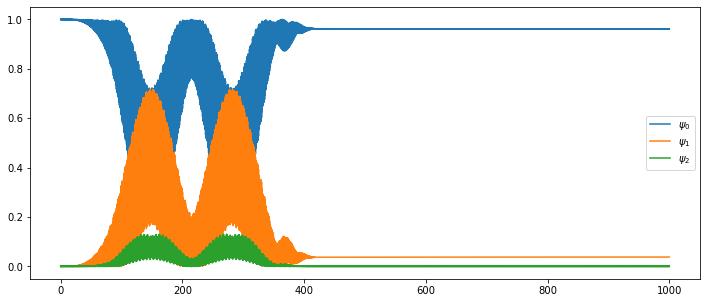

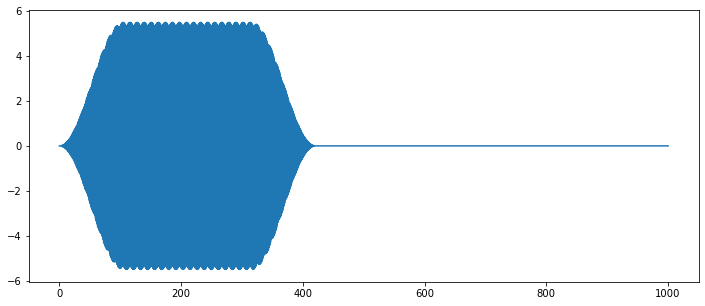

In [36]:
expectation_values = expect.get_all_expectation_values(solution.states, system.basis_states)
fig, ax = plt.subplots(figsize=(12, 5))
for i in range(0, len(expectation_values)):
    ax.plot(tlist, expectation_values[i], label="$\psi_{%i}$" % i)
plt.legend()
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(tlist, pulse_gen.get_pulse(tlist))